In [116]:
import os
# import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from datetime import timedelta
from datetime import datetime


data = pd.read_csv('starcraft_player_data.csv')

# Data Quality Checks and Report

In [117]:
data.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [118]:
data = data.dropna()

## Deleting the na values from the dataset

In [119]:
data.shape

(3395, 20)

In [120]:
data.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

- From the table we can see that the Age, Total Hours and Hours per week is in object format and for further analysis we need to convert into numeric type

In [121]:
data.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [122]:
data.count() * 100 / len(data)

GameID                  100.0
LeagueIndex             100.0
Age                     100.0
HoursPerWeek            100.0
TotalHours              100.0
APM                     100.0
SelectByHotkeys         100.0
AssignToHotkeys         100.0
UniqueHotkeys           100.0
MinimapAttacks          100.0
MinimapRightClicks      100.0
NumberOfPACs            100.0
GapBetweenPACs          100.0
ActionLatency           100.0
ActionsInPAC            100.0
TotalMapExplored        100.0
WorkersMade             100.0
UniqueUnitsMade         100.0
ComplexUnitsMade        100.0
ComplexAbilitiesUsed    100.0
dtype: float64

- From the above 2 tables we can see that there are no missing values and our data is good to use now

In [123]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')

data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')

In [124]:
# data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
negative_age_count = (data['Age'] < 0).sum()
print(f"Number of negative values in the 'Age' column: {negative_age_count}")

Number of negative values in the 'Age' column: 0


In [125]:
# data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')
# data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')

In [126]:
%%time
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file('Data Summary.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 2min 1s, sys: 1.28 s, total: 2min 2s
Wall time: 48.1 s


# Data Summary

- The above is data summary for all the fields we have. It consists of mean, missing values, duplicate rows and distribution plot.

# EDA

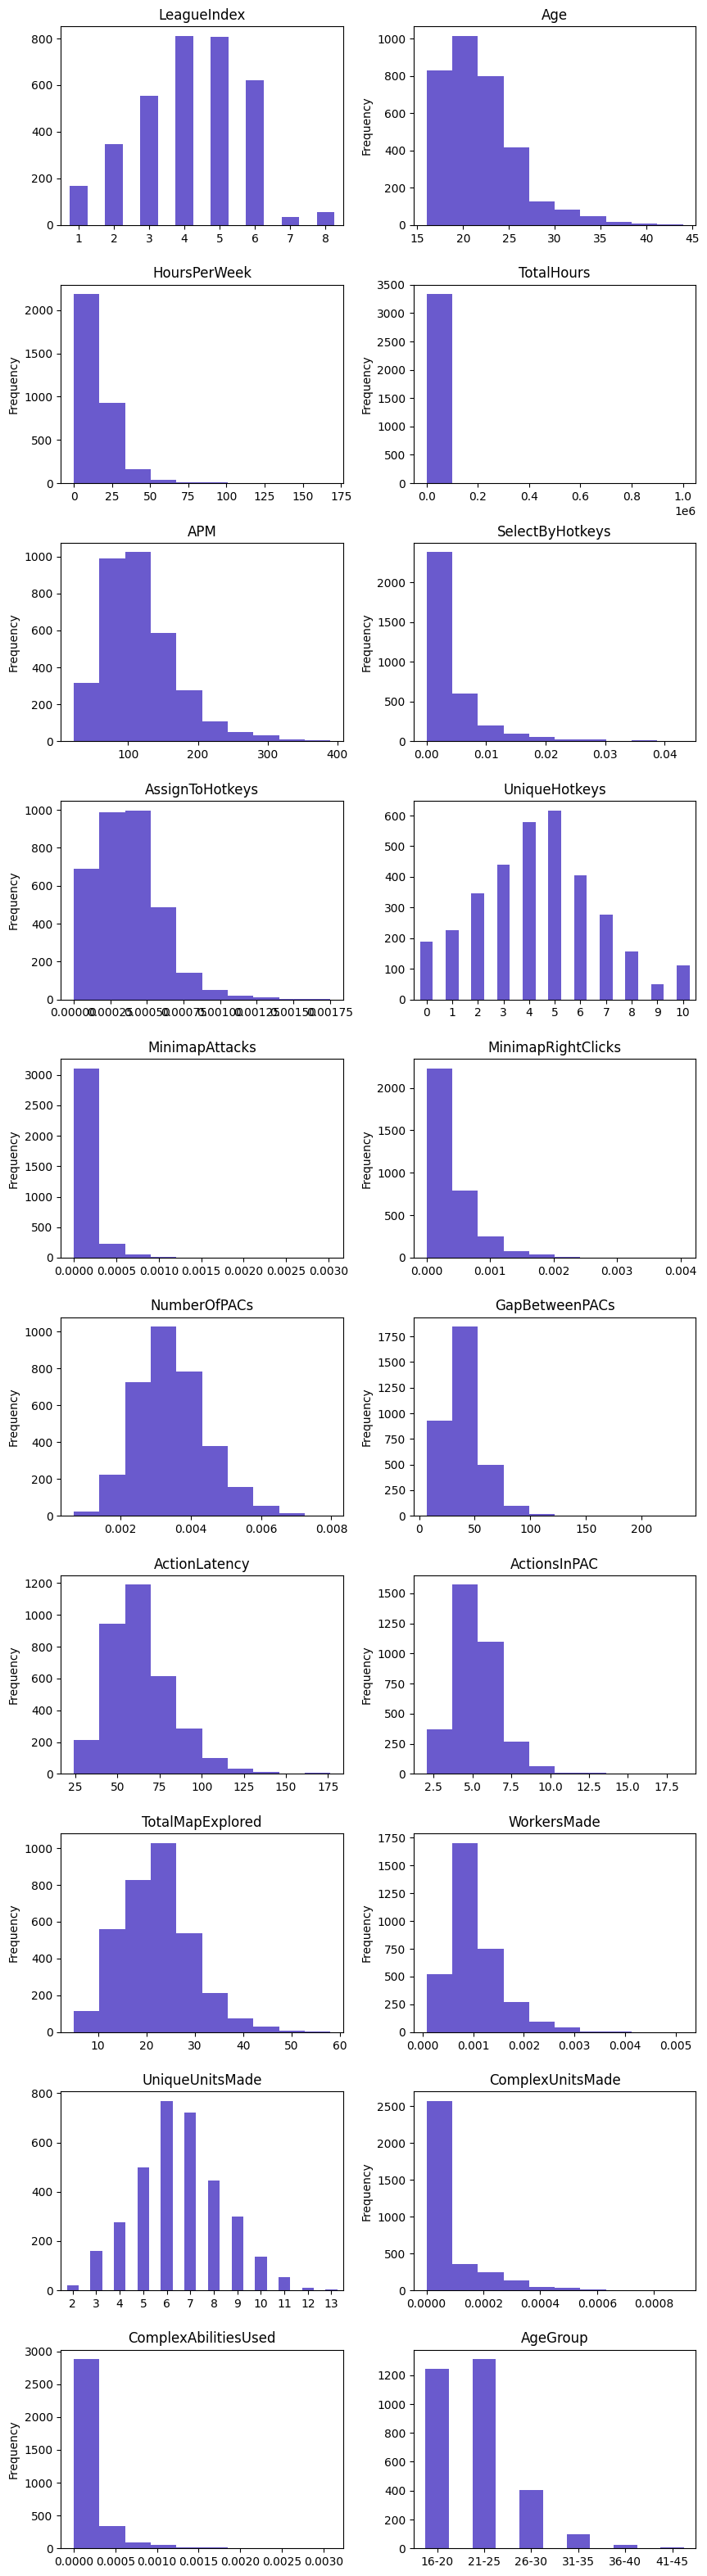

In [146]:
rsm.distr_plot(data.loc[:,data.columns != 'GameID'])

## Observations from the above distribution plots

- League Index: We can observe that most of the people are in 4th or 5th rank
- Age: Most of the people in the dataset belong to the age group of 16-25 which kinda makes sense as youngsters tend to play a lot when compared to people above 30.
- Hoursperweek: Most of the players are spending time between 10 - 25 hours and the average is 17
- Action Latency: This data is normally distributed and it lies from 25-100
- APM: This is a key feature which shows a normally distributed data with a high of nearly 1000
- Age Group: This feature tells us where our most of the players from and this will be useful when we have new games coming up or new premium features
- Rest of the variables are normally distributed and we need not make changes to the data

In [130]:
# Group the data by 'Age' and calculate the mean of 'TotalHours' and 'HoursPerWeek'
age_group_data = data.groupby('Age')[['TotalHours', 'HoursPerWeek']].mean().reset_index()
age_group_data

,Age,TotalHours,HoursPerWeek
0,16.0,678.886719,20.062500
1,17.0,654.129555,18.750000
2,18.0,3679.555556,18.086420
3,19.0,644.031949,17.028754
4,20.0,722.955182,16.218487
5,21.0,658.200581,15.959302
6,22.0,810.385350,15.974522
7,23.0,733.262548,15.768340
8,24.0,684.128889,14.746667
9,25.0,625.220238,12.547619


## From the above table we can how much time is being spent by each group player, some of the highlights are:

- Players of age group 18 have the highest time spent on the game, the reason might be because we have most of the players in that age group
- The 16 year old players have the highest average time spent on the game

In [131]:
data.dtypes

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

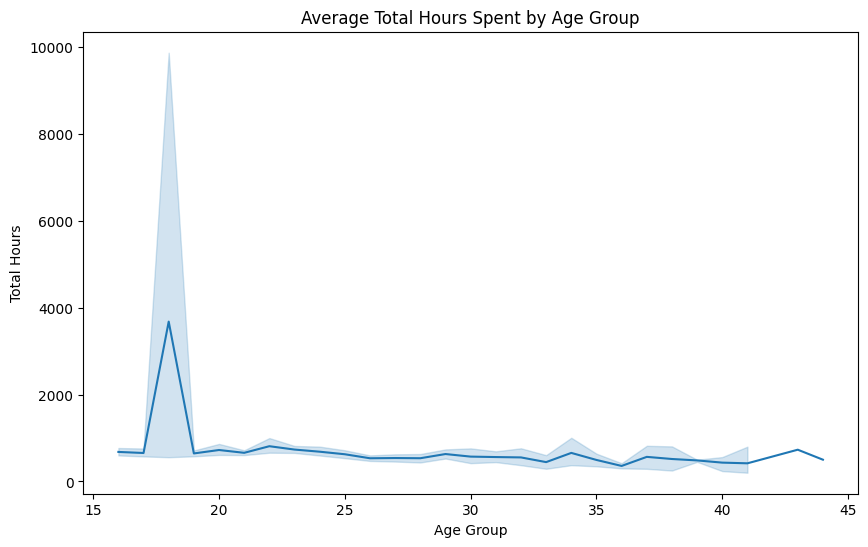

In [147]:
%matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='TotalHours', data=data)
plt.xlabel('Age Group')
plt.ylabel('Total Hours')
plt.title('Average Total Hours Spent by Age Group')
plt.show()

## From the above graph we can see that

- Most of the players between 16-20 are spending most of the time
- The time spent gradually decreases as the age increases

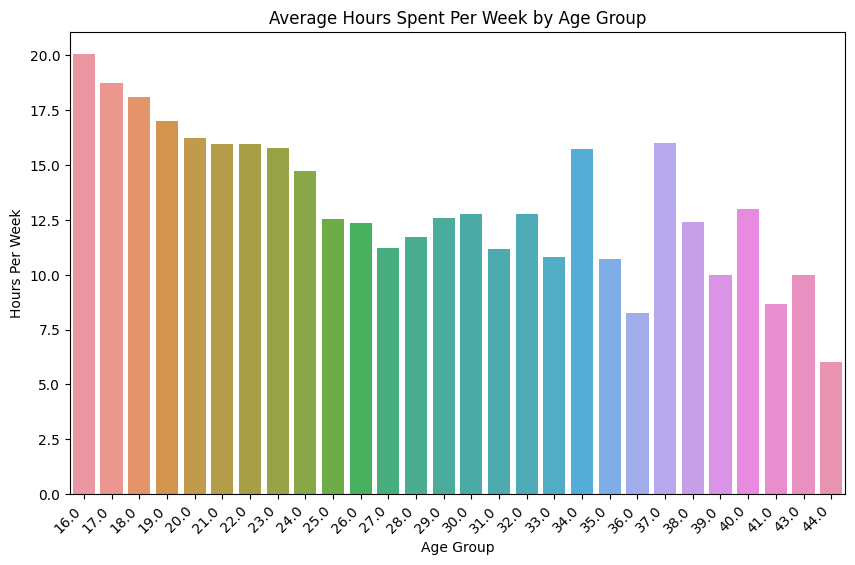

In [137]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='HoursPerWeek', data=age_group_data)
plt.xlabel('Age Group')
plt.ylabel('Hours Per Week')
plt.title('Average Hours Spent Per Week by Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()

## From the above graph we can see that

- Players of age 16 are spending most of their time in the week in playing the game and the least of the age group 44
- As we can observe, most of the data is lying between 10-15 hours per week

In [138]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


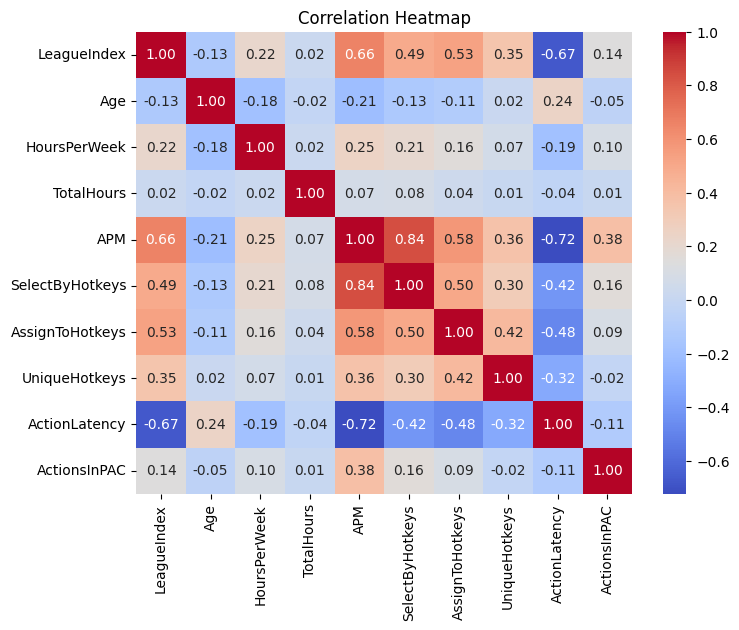

In [139]:
columns = ['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys'
                      , 'ActionLatency', 'ActionsInPAC']

# Create a subset dataframe with the selected columns
df = data[columns]

# Create correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 10})

# Set the font size of x and y tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the title
plt.title('Correlation Heatmap', fontsize=12)

# Display the heatmap
plt.show()

### Correlation Matrix

- There is a high postive correlation between League Index and Total Hours, APM, Selectbyhotkeys, AssigntoHotkeys. If a player is having high rank, they are having high APM, Selectbyhotkeys, assignbyhotkeys or vice versa

- The APM is also highly correlated with Selectbyhotkeys, assignbyhotkeys.

- One of the main observation is, we tend to think that the younger you are, the more prone to games you will be but in this case we dont have high positive correlation but there is a lil bit of affect of it.

- We could see that the Action Latency is having a negative correlation which makes sense as latency increases the higher chances the player might lose a game.

In [140]:
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
GameID,3395.0,4805.01,2719.94,52.00,2464.50,4874.00,7108.50,10095.00
LeagueIndex,3395.0,4.18,1.52,1.00,3.00,4.00,5.00,8.00
Age,3340.0,21.65,4.21,16.00,19.00,21.00,24.00,44.00
HoursPerWeek,3339.0,15.91,11.96,0.00,8.00,12.00,20.00,168.00
TotalHours,3338.0,960.42,17318.13,3.00,300.00,500.00,800.00,1000000.00
APM,3395.0,117.05,51.95,22.06,79.90,108.01,142.79,389.83
SelectByHotkeys,3395.0,0.00,0.01,0.00,0.00,0.00,0.01,0.04
AssignToHotkeys,3395.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UniqueHotkeys,3395.0,4.36,2.36,0.00,3.00,4.00,6.00,10.00
MinimapAttacks,3395.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## From the above table we can observe some of the following

- The average APM in the dataset is 117. This is an importance feature as most of the gamer's rank is correlated with this.
- The average group in the dataset is 21 with a low of 16 and the maximum of 44
- The average time spent in a week is almost 16 hours 

In [143]:
bins = [16, 20, 25, 30, 35, 40, 45]

# defining bins 
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=['16-20', '21-25', '26-30', '31-35', '36-40', '41-45'])

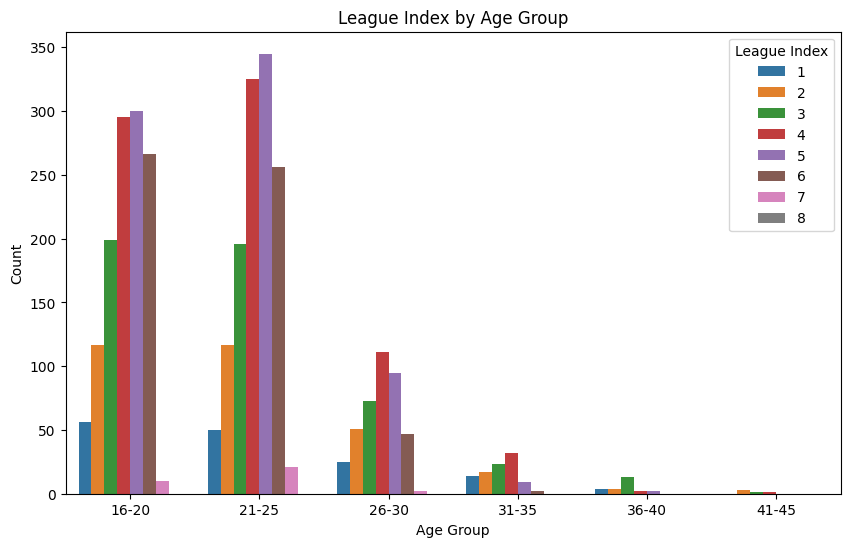

In [144]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='LeagueIndex', data=data)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('League Index by Age Group')
plt.legend(title='League Index')
plt.show()

## I have created a variable as age groups to see how well we can target them in the future

- We can see that most of the players are in the age group of 16-25
- Players with highest ranks are in the age group of 21-25
- Players with lowest ranks are in the age group of 36-45

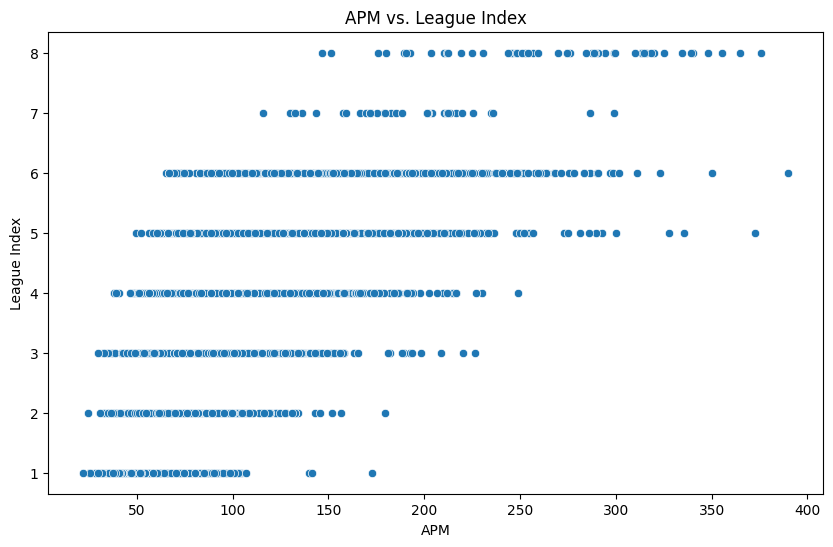

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APM', y='LeagueIndex', data=data)
plt.xlabel('APM')
plt.ylabel('League Index')
plt.title('APM vs. League Index')
plt.show()

## From the above scatter plot we can observe that

- As the APM increases the league index increases and there are very few outliers in the data
- The players with highest league index are having APM between 150-300
- The players with lowest league index are having APM between 0-150

# Modeling

## Logistic Regression

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [163]:
X = data.drop(['LeagueIndex', 'AgeGroup'], axis=1)
y = data['LeagueIndex']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
# Identify rows with NaN values
nan_indices = np.isnan(X_train_scaled).any(axis=1)

# Removing rows with NaN values from X_train_scaled and y_train
X_train_scaled = X_train_scaled[~nan_indices]
y_train = y_train[~nan_indices]

In [167]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
from sklearn.impute import SimpleImputer

# Create an imputer with the same strategy as used for training data
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_scaled)

# Transform the test data
X_test_scaled = imputer.transform(X_test_scaled)

# Make predictions using the logistic regression model
y_pred = model.predict(X_test_scaled)

### Model Evaluation

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

accuracy = model.score(X_test_scaled, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Accuarcy:", accuracy)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Accuarcy: 0.3637702503681885
Mean Squared Error (MSE): 1.2444771723122239
R-squared (R2): 0.44546839269870675
Mean Absolute Error (MAE): 0.8203240058910162


## Interpretation for the Logistic Regression

- The MSE value of 1.244 indicates the average squared difference between the predicted and actual values. A lower MSE suggests better model performance. the model's predictions deviate by approximately 1.244 units from the actual values

- The R-squared value of 0.445 indicates the proportion of the variance in the target variable that can be explained by the model. In this case, the R2 value of 0.445 suggests that the model explains 44.5% of the variance in the target variable, leaving approximately 55.5% unexplained.

- The accuracy value of 0.364 indicates the proportion of correct predictions made by the model. It measures the model's overall correctness. In this case, the accuracy of 0.364 implies that the model correctly predicts the target variable approximately 36.4% of the time

## Logistic Regression with Interactions

In [173]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Spliting the data into features (X) and target variable (y)
X = data.drop(['LeagueIndex', 'AgeGroup'], axis=1)
y = data['LeagueIndex']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Fitting the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [174]:
# We are creating an instance of the PolynomialFeatures class which will have some interations between the 
# features available and this will capture interactions which will increase the accuracy.

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Generating interaction features
X_train_interactions = poly.fit_transform(X_train_scaled)
X_test_interactions = poly.transform(X_test_scaled)

model = LogisticRegression()
model.fit(X_train_interactions, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
## Model Evaluation

accuracylr = model.score(X_test_interactions, y_test)
mselr = mean_squared_error(y_test, y_pred)
r2lr = r2_score(y_test, y_pred)
maelr = mean_absolute_error(y_test, y_pred)

print("Accuarcy:", accuracylr)
print("Mean Squared Error (MSE):", mselr)
print("R-squared (R2):", r2lr)
print("Mean Absolute Error (MAE):", maelr)

Accuarcy: 0.4020618556701031
Mean Squared Error (MSE): 1.2444771723122239
R-squared (R2): 0.44546839269870675
Mean Absolute Error (MAE): 0.8203240058910162


## From the above model evaluation we can conclude there are good amount of interactions between the variables and it has aided in increasing the accuracy.

# NN Model

In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [40]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000] 
}

In [41]:
# from sklearn.neural_network import MLPRegressor

# # Set the best hyperparameters
# best_hyperparameters = {
#     'activation': 'tanh',
#     'alpha': 0.01,
#     'hidden_layer_sizes': (50, 50),
#     'max_iter': 1000
# }

# # Build the MLPRegressor model with the best hyperparameters
# model = MLPRegressor(random_state=42, **best_hyperparameters)

# # Fit the model
# model.fit(X_train_scaled, y_train)

## Hyper parameter tuning

In [43]:
model = MLPRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
                         'max_iter': [1000, 2000]},
             scoring='neg_mean_squared_error')

In [44]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}
Best MSE: 1.5690144169456386


In [46]:
best_model_NN = grid_search.best_estimator_
y_pred = best_model_NN.predict(X_test_scaled)

In [178]:
msenn = mean_squared_error(y_test, y_pred)
r2nn = r2_score(y_test, y_pred)
maenn = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", msenn)
print("R^2 Score:", r2nn)
print("MAE:", maenn)

Mean Squared Error (MSE): 1.2444771723122239
R^2 Score: 0.44546839269870675
MAE: 0.8203240058910162


### Interpretation of NN Model

- The MSE value of 1.24 indicates the average squared difference between the predicted values and the true values.

- The R^2 score of 0.445 suggests that approximately 44.55% of the variance in the target variable can be explained by the input variables.

- The MAE of 0.82 suggests that, on average, the absolute difference between the predicted and true values is 0.82.

# Random Forest

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Split the data into X and y
X = data.drop(['LeagueIndex', 'AgeGroup'], axis=1)
y = data['LeagueIndex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [180]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 1.0]
}

# Build the Random Forest model and perform hyperparameter tuning using GridSearchCV
model_rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding mean squared error (MSE)
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best MSE:", -grid_search_rf.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best MSE: 0.8279600219400043


In [ ]:
# # Create and fit the Random Forest model with the best hyperparameters
# best_model_rf = RandomForestRegressor(random_state=42, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
# best_model_rf.fit(X_train_scaled, y_train)

# # Predict the target variable for the test set using the best model
# y_pred_rf = best_model_rf.predict(X_test_scaled)

In [182]:
best_model_rf = grid_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test_scaled)

In [183]:
mserf = mean_squared_error(y_test, y_pred)
r2rf = r2_score(y_test, y_pred)
maerf = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mserf)
print("R^2 Score:", r2rf)
print("MAE:", maerf)

Mean Squared Error (MSE): 0.8441114976290418
R^2 Score: 0.6238689500008785
MAE: 0.7317738773917971


### Interpretation of RF model

- The MSE value of 0.84 indicates the average squared difference between the predicted values and the true values. This indicates that the model's predictions are relatively close to the true values when compared to Logistic Regression and Neural Network Model

- The R^2 score of 0.62 suggests that approximately 62.39% of the variance in the target variable can be explained by the input variables. This indicates that the model captures a significant portion of the variability in the target variable

- The MAE of 0.73 suggests that, on average, the absolute difference between the predicted and true values is 0.73 and we can say that the model's predictions are relatively close to the true values.

In [185]:
# Get feature importances from the best random forest model
importances = best_model_rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
4,APM,0.290018
12,ActionLatency,0.260113
3,TotalHours,0.084747
0,GameID,0.078623
6,AssignToHotkeys,0.038004
8,MinimapAttacks,0.036757
5,SelectByHotkeys,0.034550
11,GapBetweenPACs,0.027004
15,WorkersMade,0.025379
10,NumberOfPACs,0.020882


### Feature importance of RF Model

- From the above table, we can see that the top 5 features which are affecting the model are APM, Action latency, Total hours, Assign to hot key

- Surprisingly, the age group doesn't have an impact on the rank of the player and also how many hours they are spending on the game in a week

### Best Model

- We can conclude that the Random Forest classification model is the best as it gives us the best model evaluation metrics

- MSE: 0.84
- MAE: 0.73
- R2: 0.62 

# Guidance and advise for Stakeholders

- Firstly, collecting more data can help us build a better model and enhance the performance it and can help capture a broader representation of player characteristics and behaviors.

- Key Areas to focus on
    - Age: Collecting more data across a wider age range can provide a better understanding of the relationship between age and player ranks. This will help us determine if there are any significant age-related trends or patterns.
    - APM and Action Latency: Gathering more data related to APM and action latency can contribute to a more accurate model, as these features have shown to be important in predicting player ranks.
    - League Index: Since the model's predictions are influenced by league index, collecting more data points from players across various league ranks can lead to improved accuracy and a better understanding of the factors driving rank progression
    
- Collecting more data related to total hours, assign to hotkey, and select by hotkey which have shown significant correlations with the league index. It is important to continue collecting data on these features to maintain their relevance in the model.

- Explore Other Features: While the current dataset includes relevant features, stakeholders could consider exploring additional variables that might impact player ranks. For example, factors like game-specific strategies, in-game resources, or player feedback could be collected to gain further insights into rank determination

- As more data is collected, it is crucial to regularly evaluate the model's performance and iterate accordingly. This involves retraining the model on the expanded dataset and assessing the impact of the new data on the model's predictive power.

- By continuously evaluating the model's performance and incorporating new data, the stakeholders can ensure that the model remains up-to-date and relevant to the evolving dynamics of the game and player behaviors. 

#### Overall, collecting more data while focusing on key areas of improvement and maintaining a comprehensive and diverse dataset will likely lead to enhanced model performance and more accurate predictions of player ranks